# Exploring Matplotlib's Font Families: A Visual Guide

This interactive notebook provides a step-by-step tutorial to explore and visualize all the default font families available in Matplotlib. Understanding the different font options is crucial for customizing text appearance in your plots. This guide will help you to see how each font family renders text, including styles and potential issues with glyph rendering. Whether you are a beginner or an advanced user, this visualization tool will enhance your ability to design more readable and visually appealing plots.


In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import warnings  # Ensure warnings are available for handling in later cells
from IPython.display import display, Markdown

## Listing Default Fonts in Matplotlib

After importing the necessary libraries, the next step is to retrieve and list all the font families that are loaded by default in Matplotlib. This will give us a comprehensive overview of the text styling options available out-of-the-box.


In [2]:
# Retrieve the list of all available font names
font_names = font_manager.get_font_names()

display(Markdown("### Available font names:"))
display(Markdown("\n".join([f"- {font}" for font in font_names])))

### Available font names:

- Liberation Sans
- cmss10
- STIXSizeOneSym
- cmsy10
- cmmi10
- DejaVu Sans Display
- STIXGeneral
- Liberation Sans Narrow
- cmtt10
- STIXSizeFourSym
- DejaVu Serif
- STIXSizeThreeSym
- cmb10
- DejaVu Serif Display
- STIXNonUnicode
- DejaVu Sans Mono
- Liberation Mono
- Humor Sans
- cmr10
- DejaVu Sans
- STIXSizeFiveSym
- cmex10
- STIXSizeTwoSym
- Liberation Serif

## Visualizing Font Families

We will visually explore each of the default font families available in Matplotlib. For each font, you will see how regular and italic styles render in a plot setting. This visual representation helps in assessing the appearance and usability of different fonts for various data visualization tasks.


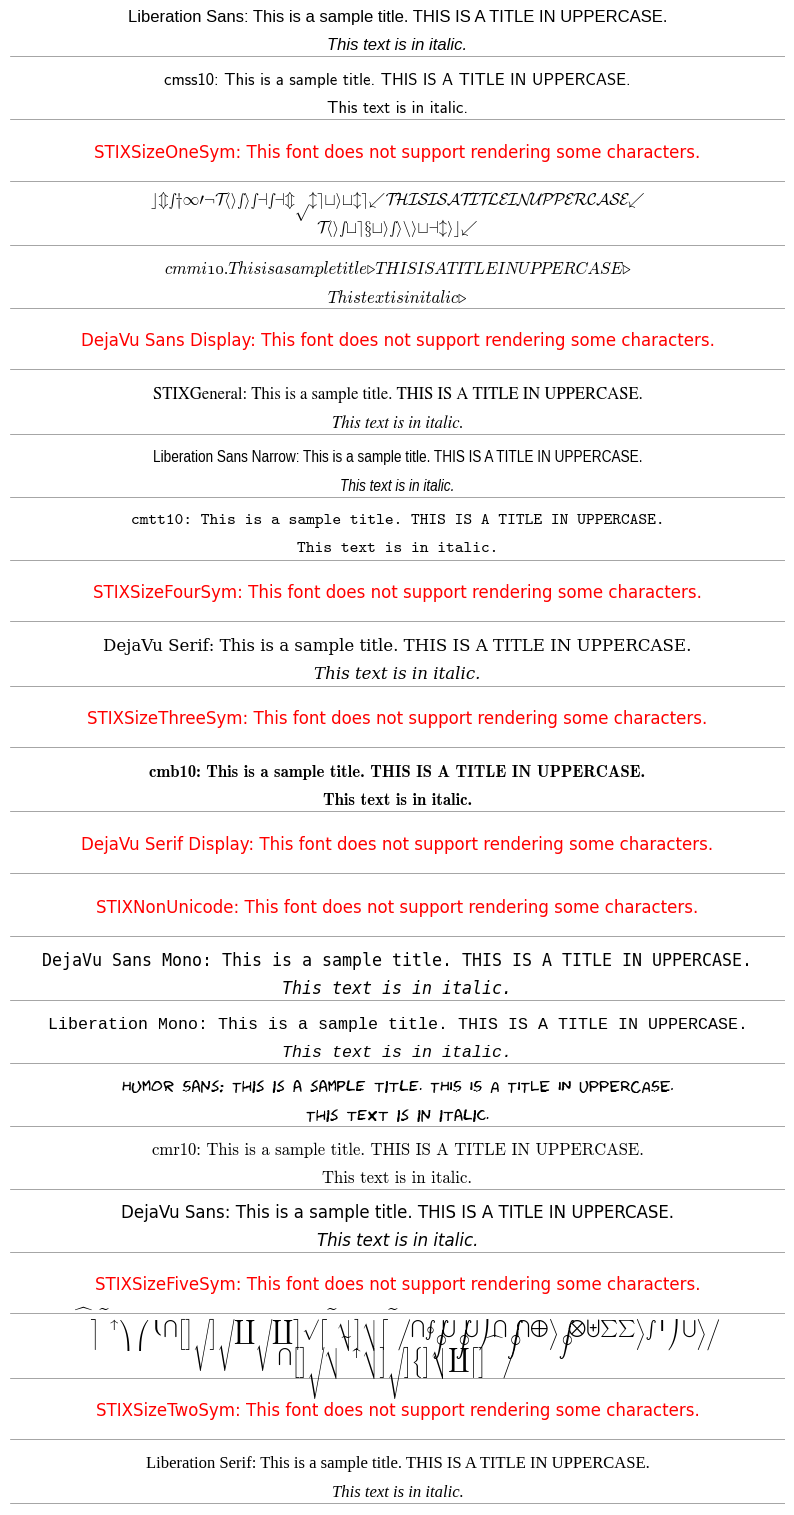

In [3]:
# Lists to store fonts that render successfully and those that do not
fonts_with_complete_glyphs = []
fonts_with_missing_glyphs = []

# Set up the plotting environment to visualize each font family
plt.figure(figsize=(10, len(font_names) * 0.8))  # Adjusted vertical size for better visibility
plt.subplots_adjust(hspace=1)  # Increase spacing to accommodate descriptions

# Loop through each font to display sample text and track rendering success
for font_name in font_names:
    with warnings.catch_warnings(record=True) as w:
        warnings.simplefilter("always")  # Change filter to capture all warnings
        ax = plt.subplot(len(font_names), 1, font_names.index(font_name) + 1)

        try:
            # Display the font name with normal and italic text
            normal_text = f"{font_name}: This is a sample title. THIS IS A TITLE IN UPPERCASE."
            italic_text = "This text is in italic."  # Italic style for comparison

            # Render the text in the specified font
            ax.text(0.5, 1.3, normal_text, fontsize=12, ha='center', va='center', fontname=font_name)
            ax.text(0.5, 0.4, italic_text, fontsize=12, ha='center', va='center', fontname=font_name, style='italic')
            ax.axhline(y=0.05, color='grey', linewidth=0.5)
            plt.draw()  # Force drawing to handle potential warnings

            # Check for missing glyph warnings
            if any(['missing from current font' in str(warn.message) for warn in w]):
                raise ValueError("Missing glyphs in font")

        except ValueError:
            # Instead of printing, handle the error silently and add to the list
            fonts_with_missing_glyphs.append(font_name)
            ax.clear()
            error_message = f"{font_name}: This font does not support rendering some characters."
            ax.text(0.5, 1, error_message, fontsize=12, ha='center', va='center', color='red')
            ax.axhline(y=0.1, color='grey', linewidth=0.5)
        else:
            # If no exception was raised, add to the successful list
            fonts_with_complete_glyphs.append(font_name)

        # Clean up plot appearance by removing axes
        ax.axis('off')

# Display all plots
plt.show()

### Fonts with Rendering Issues

Below is the list of font families that do not support rendering some characters, which may cause issues in visual representations.


In [4]:
# Define the list of special fonts with text rendering issues
fonts_with_text_rendering_issues = ['cmmi10', 'cmsy10', 'cmex10']

# Display the list of fonts that have missing glyphs
display(Markdown("### Fonts that not render all glyphs:"))
display(Markdown("\n".join([f"- {font}" for font in fonts_with_missing_glyphs])))

display(Markdown("### Fonts with text rendering issues:"))
display(Markdown("\n".join([f"- {font}" for font in fonts_with_text_rendering_issues])))

### Fonts that not render all glyphs:

- STIXSizeOneSym
- DejaVu Sans Display
- STIXSizeFourSym
- STIXSizeThreeSym
- DejaVu Serif Display
- STIXNonUnicode
- STIXSizeFiveSym
- STIXSizeTwoSym

### Fonts with text rendering issues:

- cmmi10
- cmsy10
- cmex10

### Successful Font Renderings

Next, we will display texts using the fonts that successfully rendered all characters. This helps to see which fonts can be reliably used in various applications.


In [5]:
# Remove those fonts with rendering issues from the list of fonts that render successfully
fonts_with_complete_glyphs = [font for font in fonts_with_complete_glyphs if font not in fonts_with_text_rendering_issues]

# Display the list of fonts that have complete glyphs
display(Markdown("### Fonts that render successfully:"))
display(Markdown("\n".join([f"- {font}" for font in fonts_with_complete_glyphs])))

### Fonts that render successfully:

- Liberation Sans
- cmss10
- STIXGeneral
- Liberation Sans Narrow
- cmtt10
- DejaVu Serif
- cmb10
- DejaVu Sans Mono
- Liberation Mono
- Humor Sans
- cmr10
- DejaVu Sans
- Liberation Serif

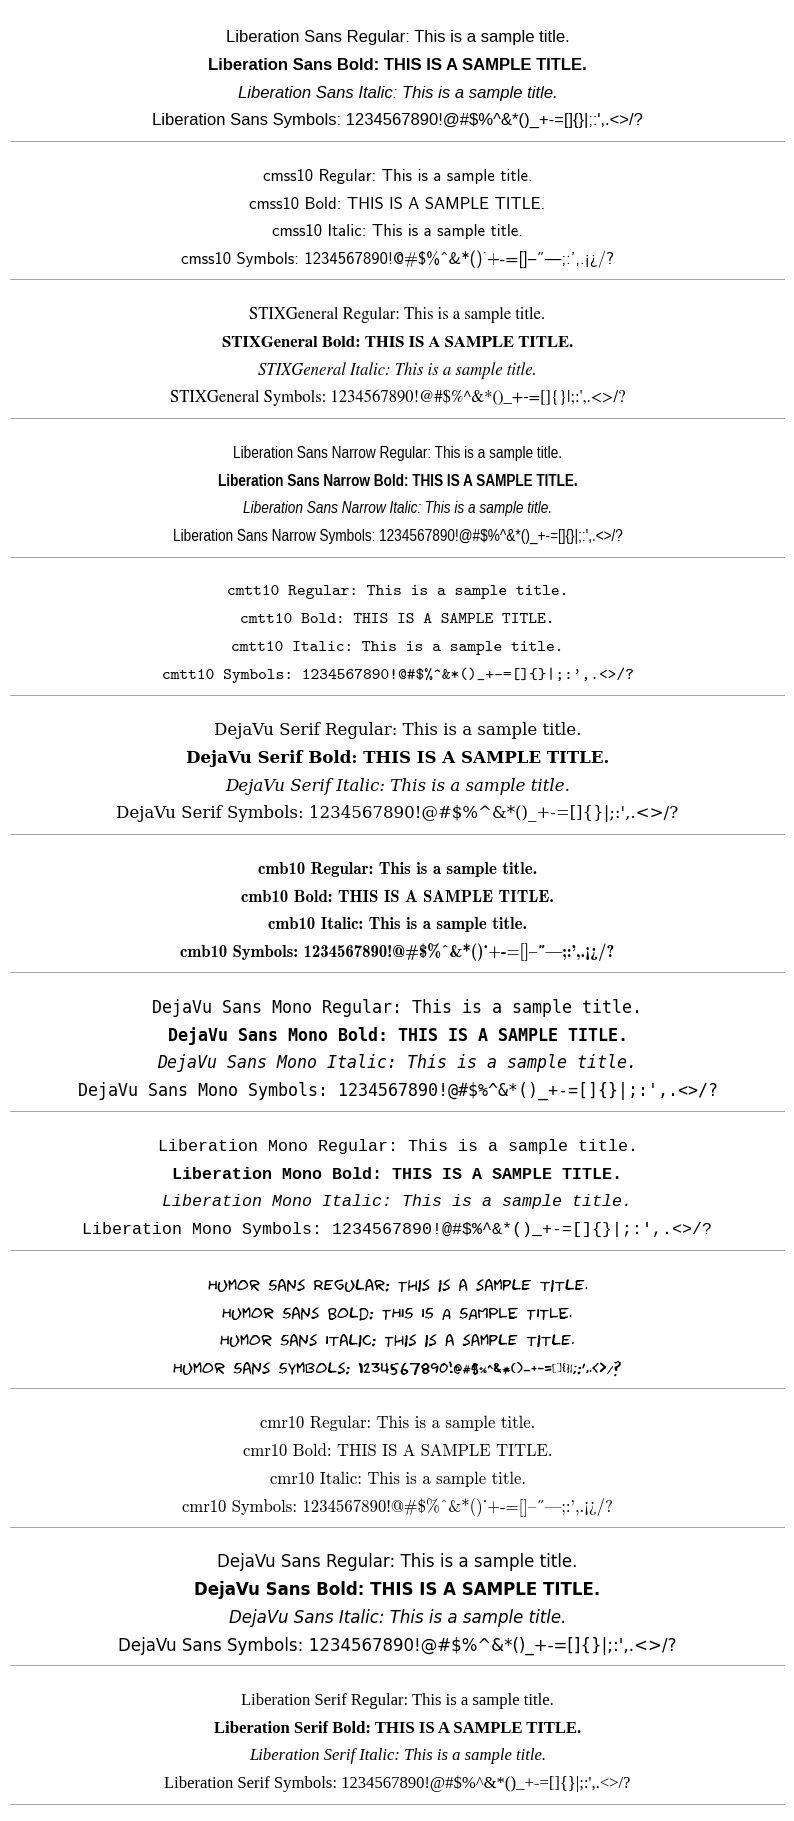

In [12]:
# Display sample text using the fonts that rendered all glyphs successfully
plt.figure(figsize=(10, len(fonts_with_complete_glyphs) * 1.8))  # Adjusted vertical size for additional text lines
plt.subplots_adjust(hspace=0)  # Increased vertical spacing

for font_name in fonts_with_complete_glyphs:
    ax = plt.subplot(len(fonts_with_complete_glyphs), 1, fonts_with_complete_glyphs.index(font_name) + 1)

    # Display different styles of text
    ax.text(0.5, 0.8, f"{font_name} Regular: This is a sample title.", fontsize=12, ha='center', va='center', fontname=font_name)
    ax.text(0.5, 0.6, f"{font_name} Bold: THIS IS A SAMPLE TITLE.", fontsize=12, ha='center', va='center', fontname=font_name, weight='bold')
    ax.text(0.5, 0.4, f"{font_name} Italic: This is a sample title.", fontsize=12, ha='center', va='center', fontname=font_name, style='italic')

    # Display common symbols
    symbols_text = "1234567890!@#$%^&*()_+-=[]{}|;:',.<>/?"
    ax.text(0.5, 0.2, f"{font_name} Symbols: {symbols_text}", fontsize=12, ha='center', va='center', fontname=font_name)

    # Aesthetic lines and settings
    ax.axhline(y=0.05, color='grey', linewidth=0.5)
    ax.axis('off')

plt.show()

## Changing the Default Font

In the code below, we demonstrate how to set the default font family to a list of preferences. Matplotlib will use the first available font from this list. This method allows for flexibility and ensures that your plots remain visually consistent even if some fonts are not supported on all systems.

In [7]:
# Example of changing the default font family for future plots
plt.rcParams['font.family'] = ['Liberation Sans', 'DejaVu Sans']

## Conclusion

By exploring the various font families available in Matplotlib as demonstrated above, you can choose the appropriate text style for your graphical presentations. Remember that not all fonts support every glyph, which is crucial when working with diverse datasets. Adjust the default font family as needed to ensure your plots are both functional and visually appealing.
